# Advanced Data Wrangling
<br>

Most of the data cleaning has already been done except analyzing operational settings and analyzing sensor ratings before engine failure. 

<b>Dataset FD001</b>

<u>Meta info:</u>  

Data Set: FD001  
Train trajectories: 100  
Test trajectories: 100  
Conditions: ONE (Sea Level)  
Fault Modes: ONE (HPC Degradation) - High Pressure Compressor 

No information on what a sensor has been measuring 

In [34]:
import pandas as pd
import numpy as np

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [35]:
dir_path = '/Users/akul/Desktop/AirplanesDataNASA/CMAPSSData/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path +'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

# inspect first few rows
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [36]:
test.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     0.0023     0.0003      100.0  518.67  643.02   
1        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2        1            3     0.0003     0.0001      100.0  518.67  642.46   
3        1            4     0.0042     0.0000      100.0  518.67  642.44   
4        1            5     0.0014     0.0000      100.0  518.67  642.51   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   392   
1  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   393   
2  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   393   
3  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   391   
4  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   390   

   s_18   s_19   s_20     s_21  
0  2388  100.0  38.86  23.3735  
1  2388  100.0  39.02  23.3916  
2  2388  100.0  39.08  23.4166  
3  2388  100.0  39.00  23.3737  
4  2388  100.0  38.99  23.4130  

[5 rows x 26 columns]

In [37]:
y_test["UnitNumber"] = y_test.index
y_test.head()


RUL  UnitNumber
0  112           0
1   98           1
2   69           2
3   82           3
4   91           4

In [38]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by ="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

unit_nr  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187

In [56]:
train

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393   
...        ...      ...    ...  ...      ...      ...     ...   ...   ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   396   

       s_18   s_19   s_20     s_21  RUL  
0      2388  100.0  39.06  23.4190  191  
1      2388  100.0  39.00  23.4236  190  
2      2388  100.0  38.95  23.3442  189  
3      2388  100.0  38.88  23.3739  188  
4      2388  100.0  38.90  23.4044  187  
...     ...    ...    ...      ...  ...  
20626  2388  100.0  38.49  22.9735    4  
20627  2388  100.0  38.30  23.1594    3  
20628  2388  100.0  38.44  22.9333    2  
20629  2388  100.0  38.29  23.0640    1  
20630  2388  100.0  38.37  23.0522    0  

[20631 rows x 27 columns]

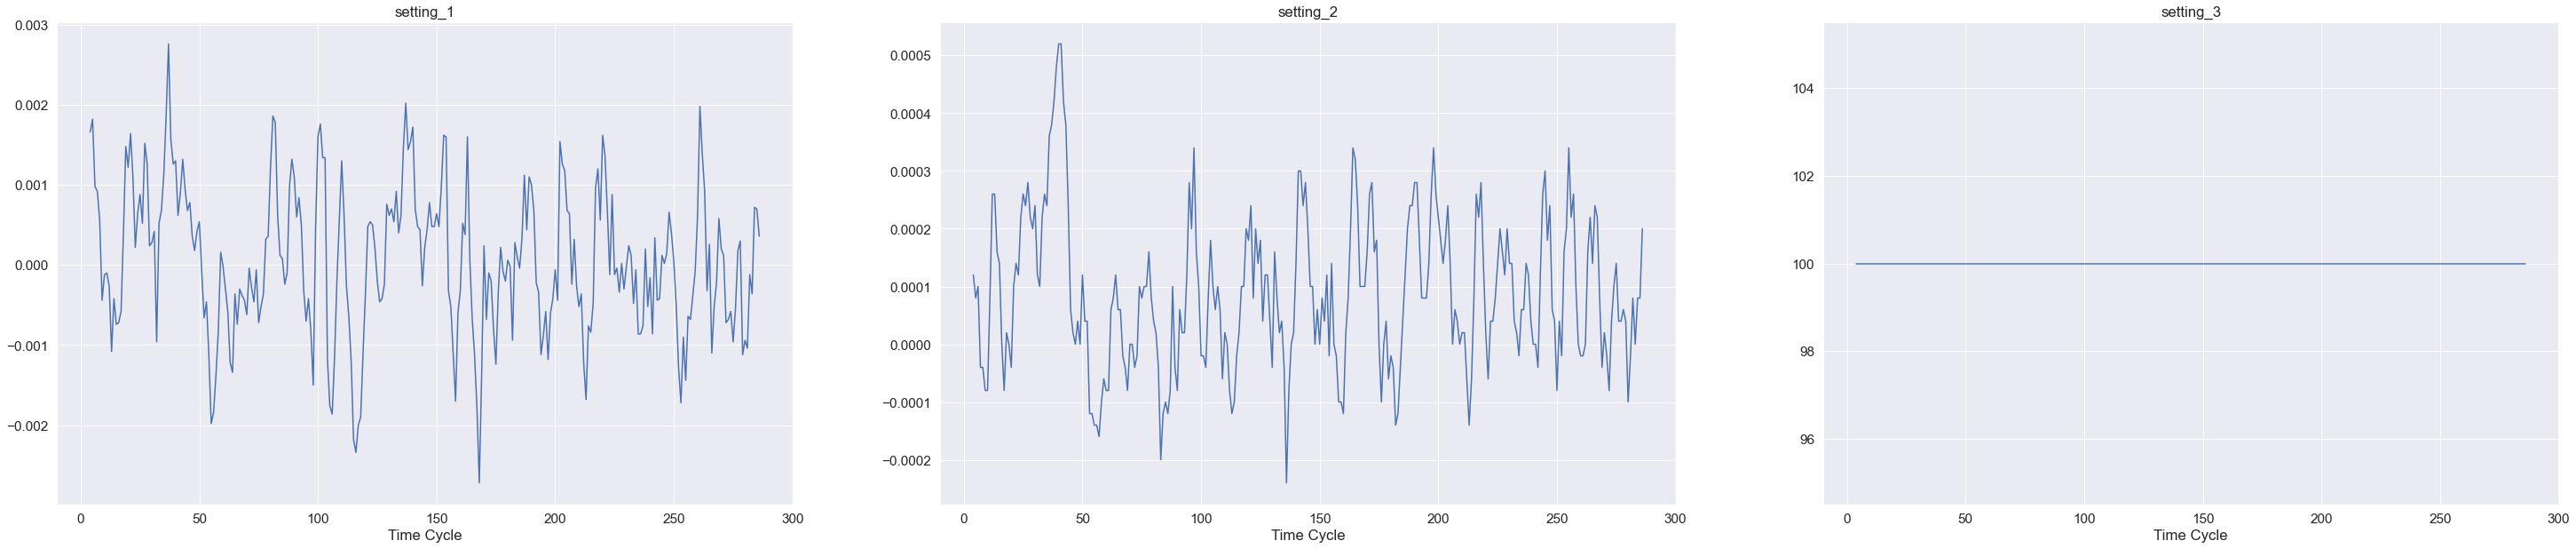

In [202]:
### plotting all 3 operational settings wrt engine #2 (unit_nr == 2) 

fig,ax=plt.subplots(1,3,figsize=(45,10), sharex='all')
for i in range(0,3):
    df_u1=train.query('unit_nr == 2').reset_index(drop = True)
    df_u1['rolling_avg'] = df_u1['setting_'+ str(i+1)].rolling(window = 5).mean()
    df_u1['rolling_avg'].plot(kind = "line", ax = ax[i])
    ax[i].set_title('setting_'+ str(i+1))
    ax[i].set_xlabel("Time Cycle")

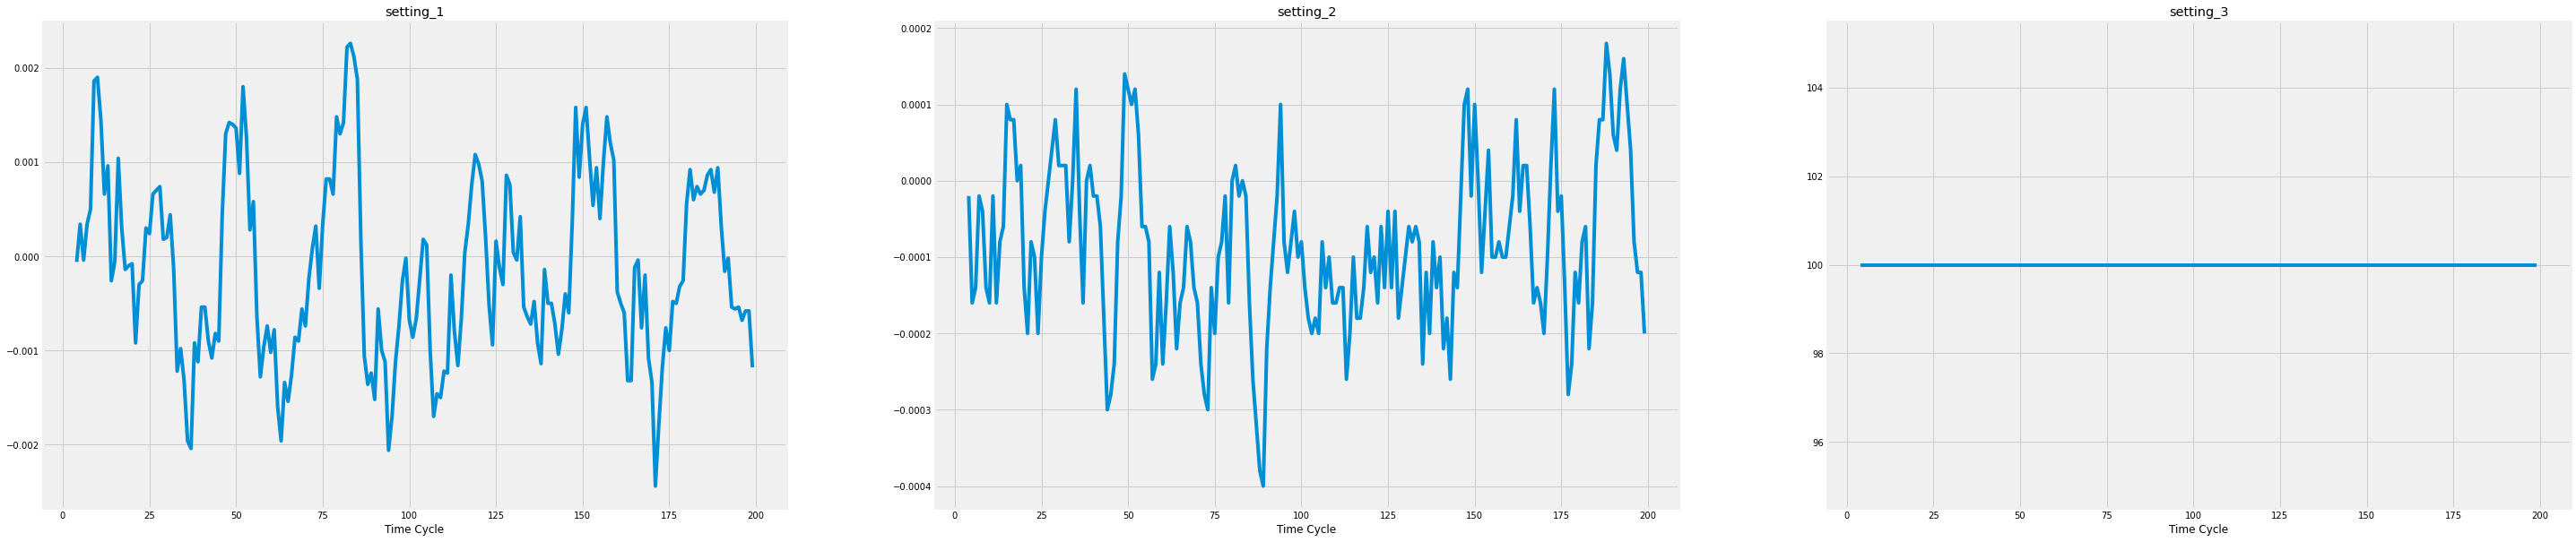

In [70]:
### plotting all 3 operational settings wrt engine #50 (unit_nr == 50) 


fig,ax=plt.subplots(1,3,figsize=(45,10),sharex='all')
for i in range(0,3):
    df_u1=train.query('unit_nr == 50').reset_index(drop = True)
    df_u1['rolling_avg'] = df_u1['setting_'+ str(i+1)].rolling(window = 5).mean()
    df_u1['rolling_avg'].plot(kind = "line", ax = ax[i])
    ax[i].set_title('setting_'+ str(i+1))
    ax[i].set_xlabel("Time Cycle")

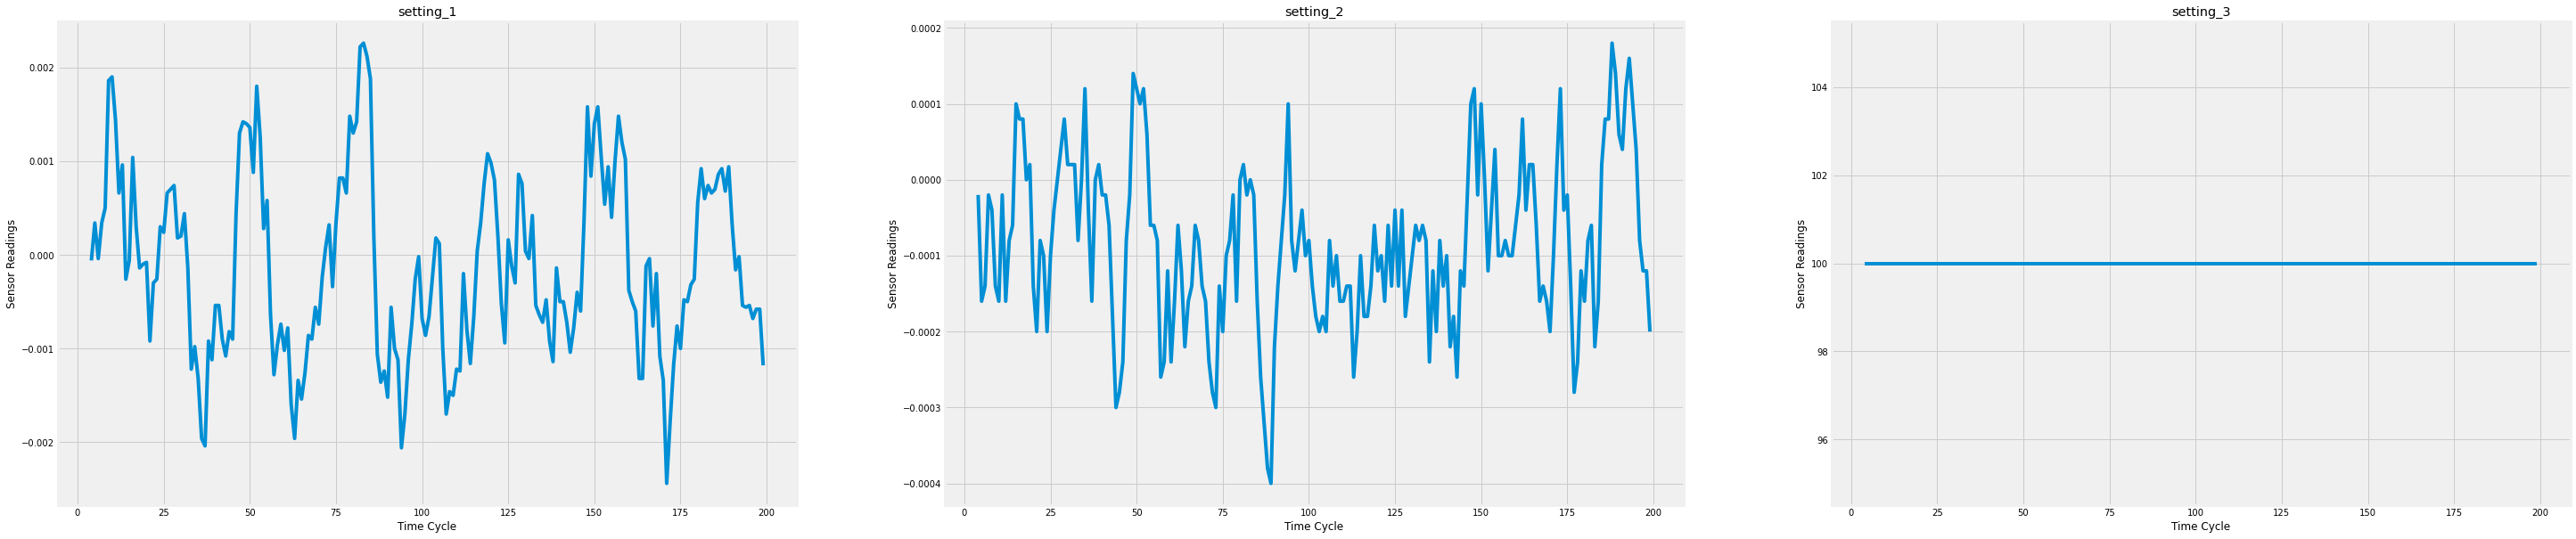

In [79]:
### plotting all 3 operational settings wrt engine #100 (unit_nr == 100) 


fig,ax=plt.subplots(1,3,figsize=(45,10),sharex='all')
for i in range(0,3):
    df_u1=train.query('unit_nr == 100').reset_index(drop = True)
    df_u1['rolling_avg'] = df_u1['setting_'+ str(i+1)].rolling(window = 5).mean()
    df_u1['rolling_avg'].plot(kind = "line", ax = ax[i])
    ax[i].set_title('setting_'+ str(i+1))
    ax[i].set_xlabel("Time Cycle")
    ax[i].set_ylabel("Sensor Readings")

### Plot for Setting 1 

Visualization wrt **Operating <u> <b>  Setting 1</b> </u> of unit_nr 1 to 15.**


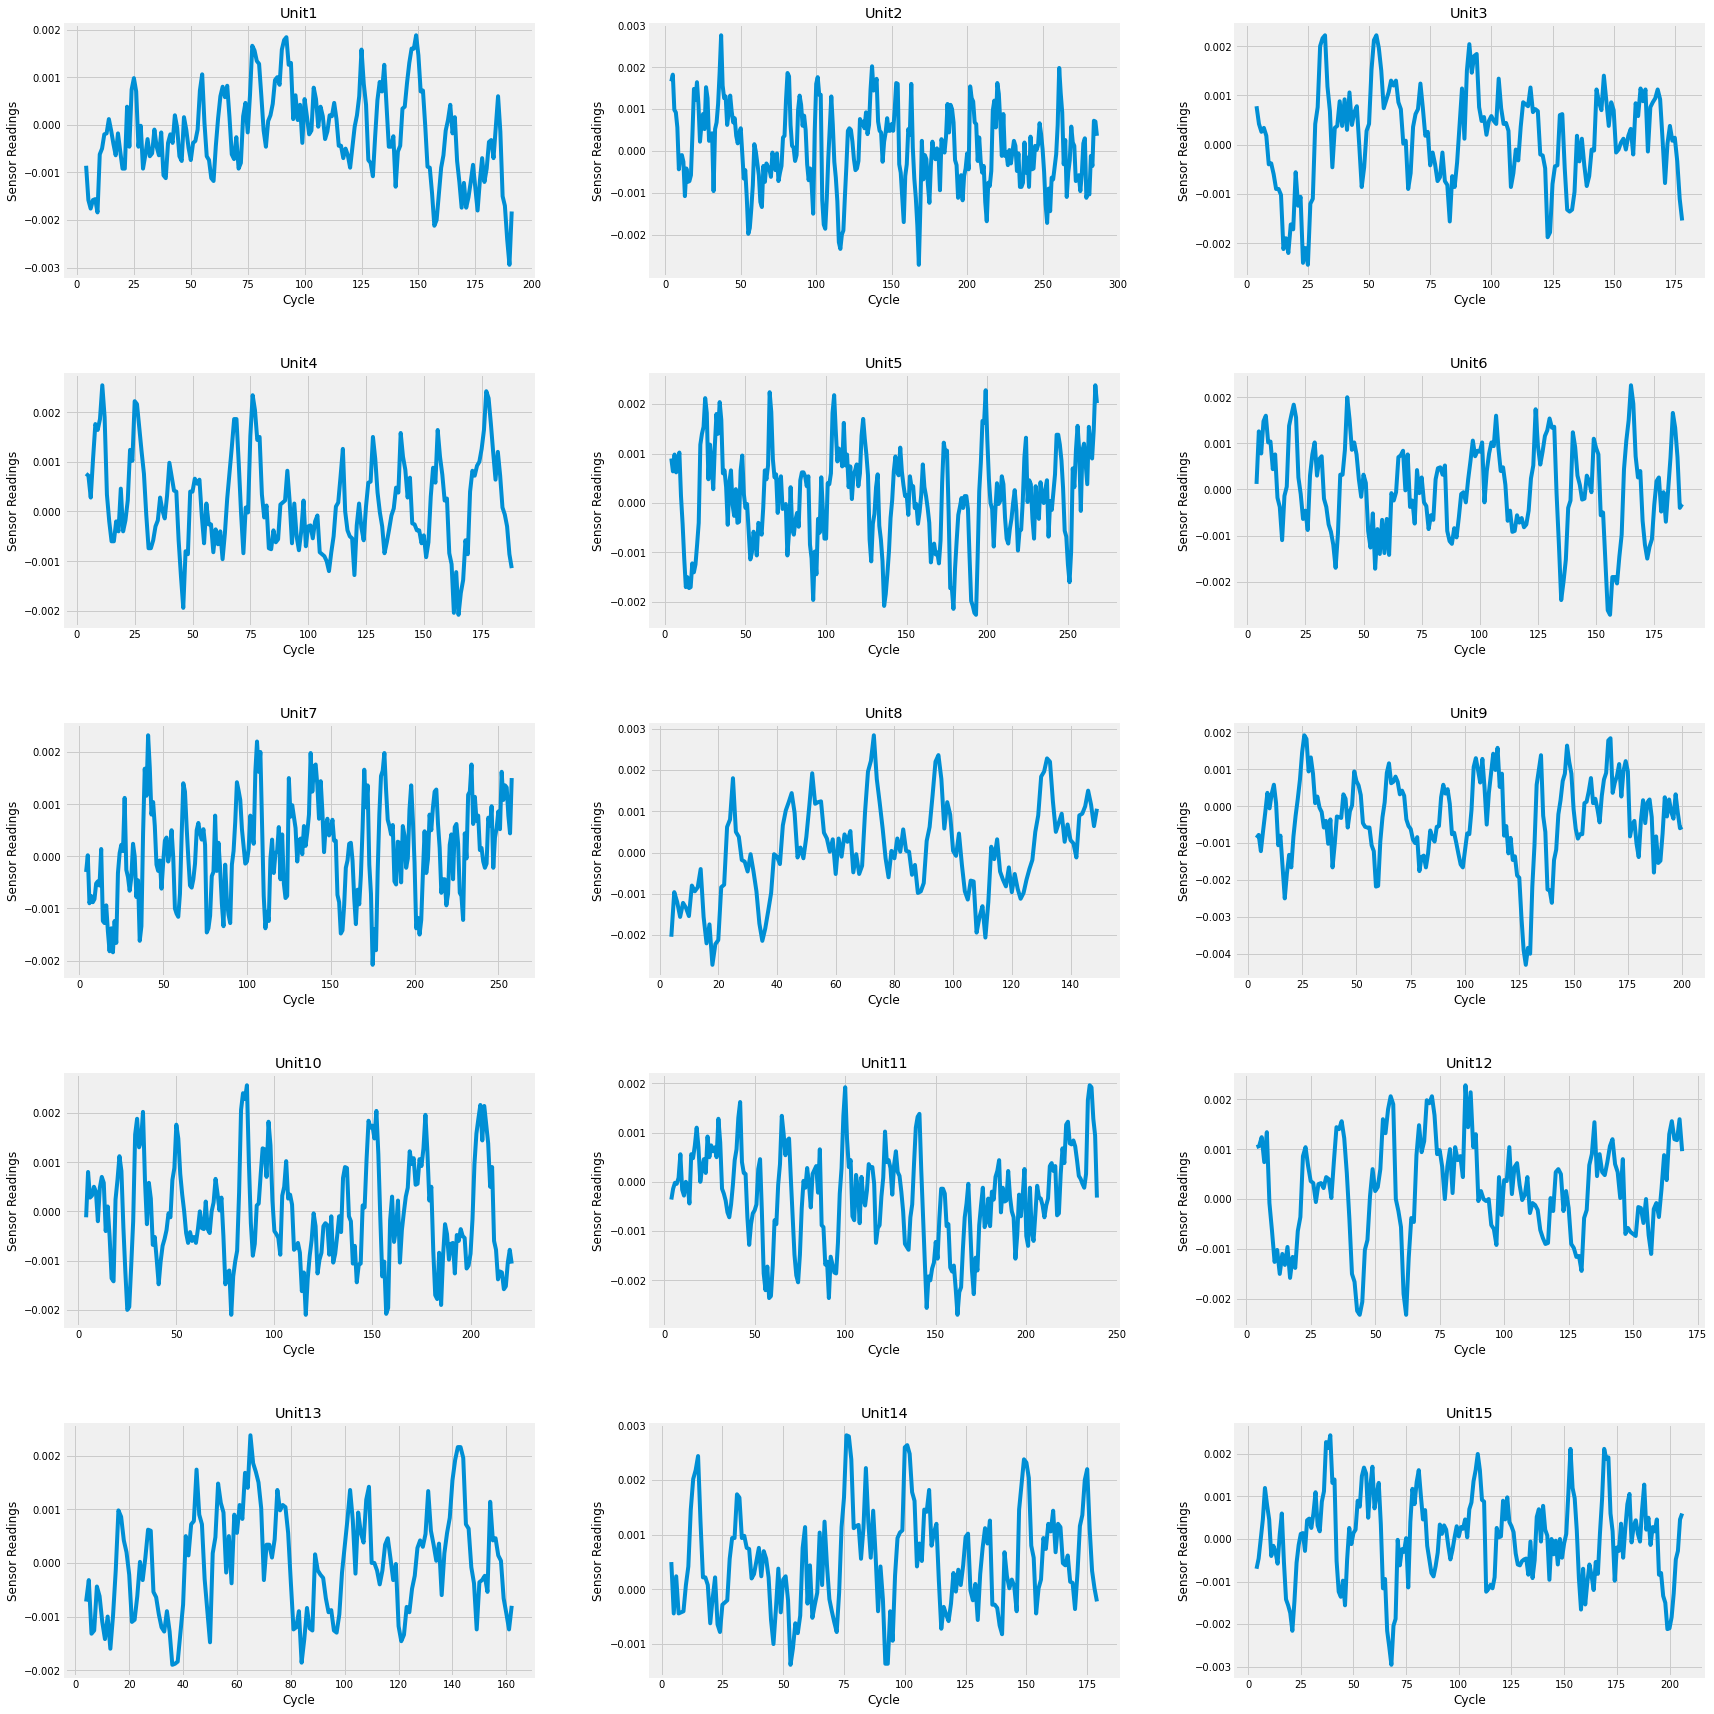

In [81]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = train.setting_1[train.unit_nr == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")
    ax[i].set_ylabel("Sensor Readings")
    plt.tight_layout(pad=5.0)

### Plot for Setting 2

Visualization wrt **Operating <u> <b>  Setting 2</b> </u> of unit_nr 1 to 15.**

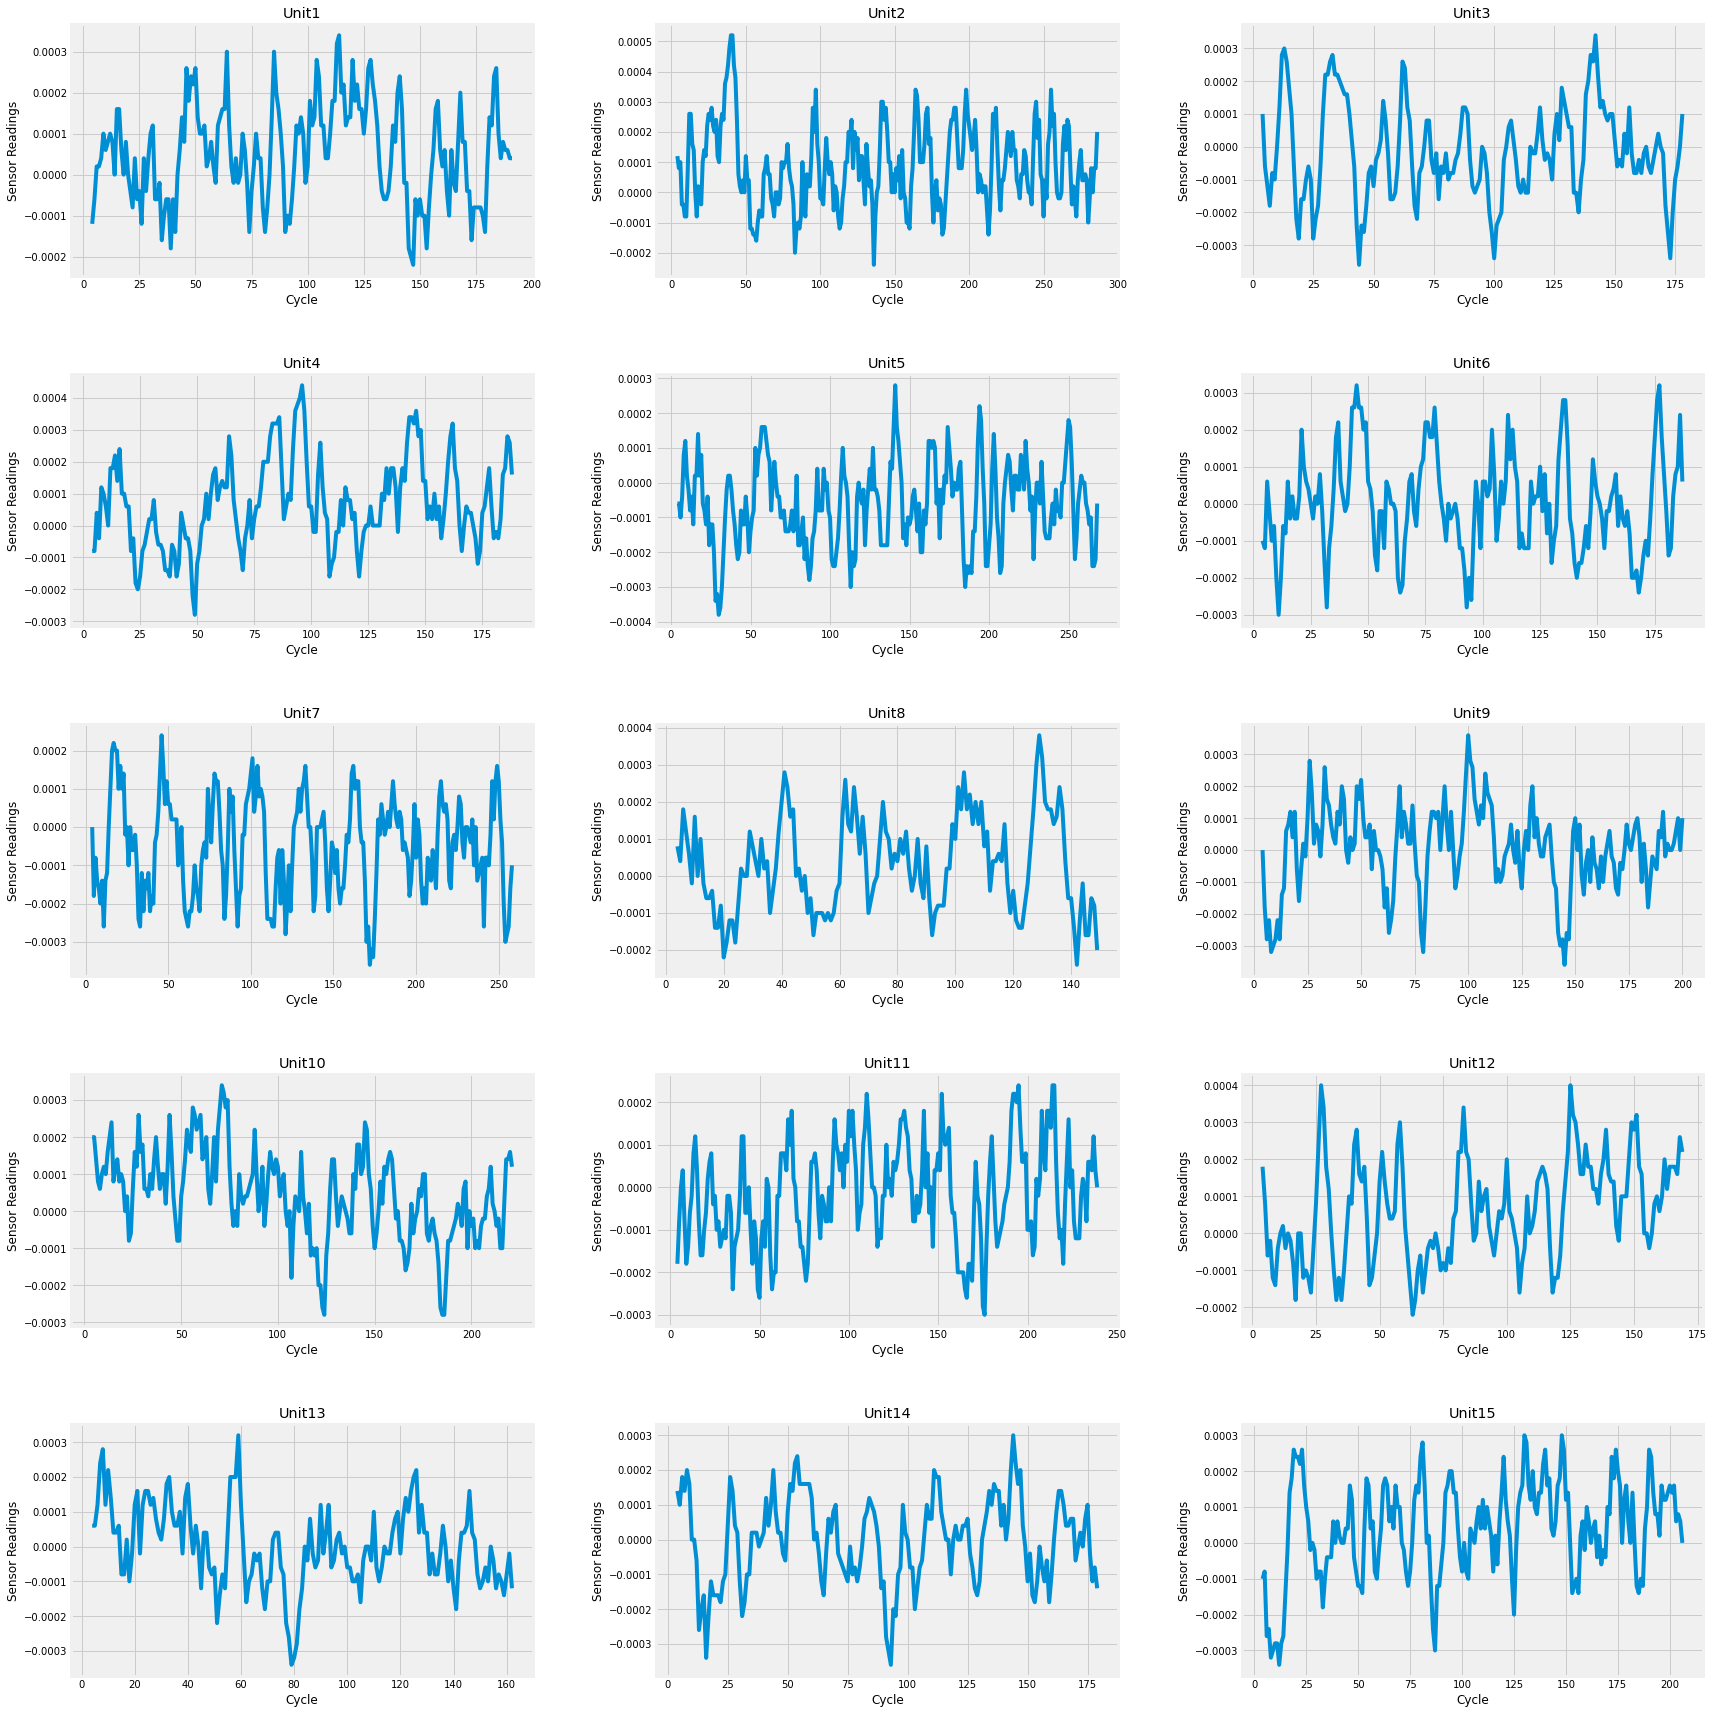

In [82]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = train.setting_2[train.unit_nr == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")
    ax[i].set_ylabel("Sensor Readings")
    plt.tight_layout(pad=5.0)

### Plot for Setting 3

Visualization wrt **Operating <u> <b>  Setting 3</b> </u> of unit_nr 1 to 15.**

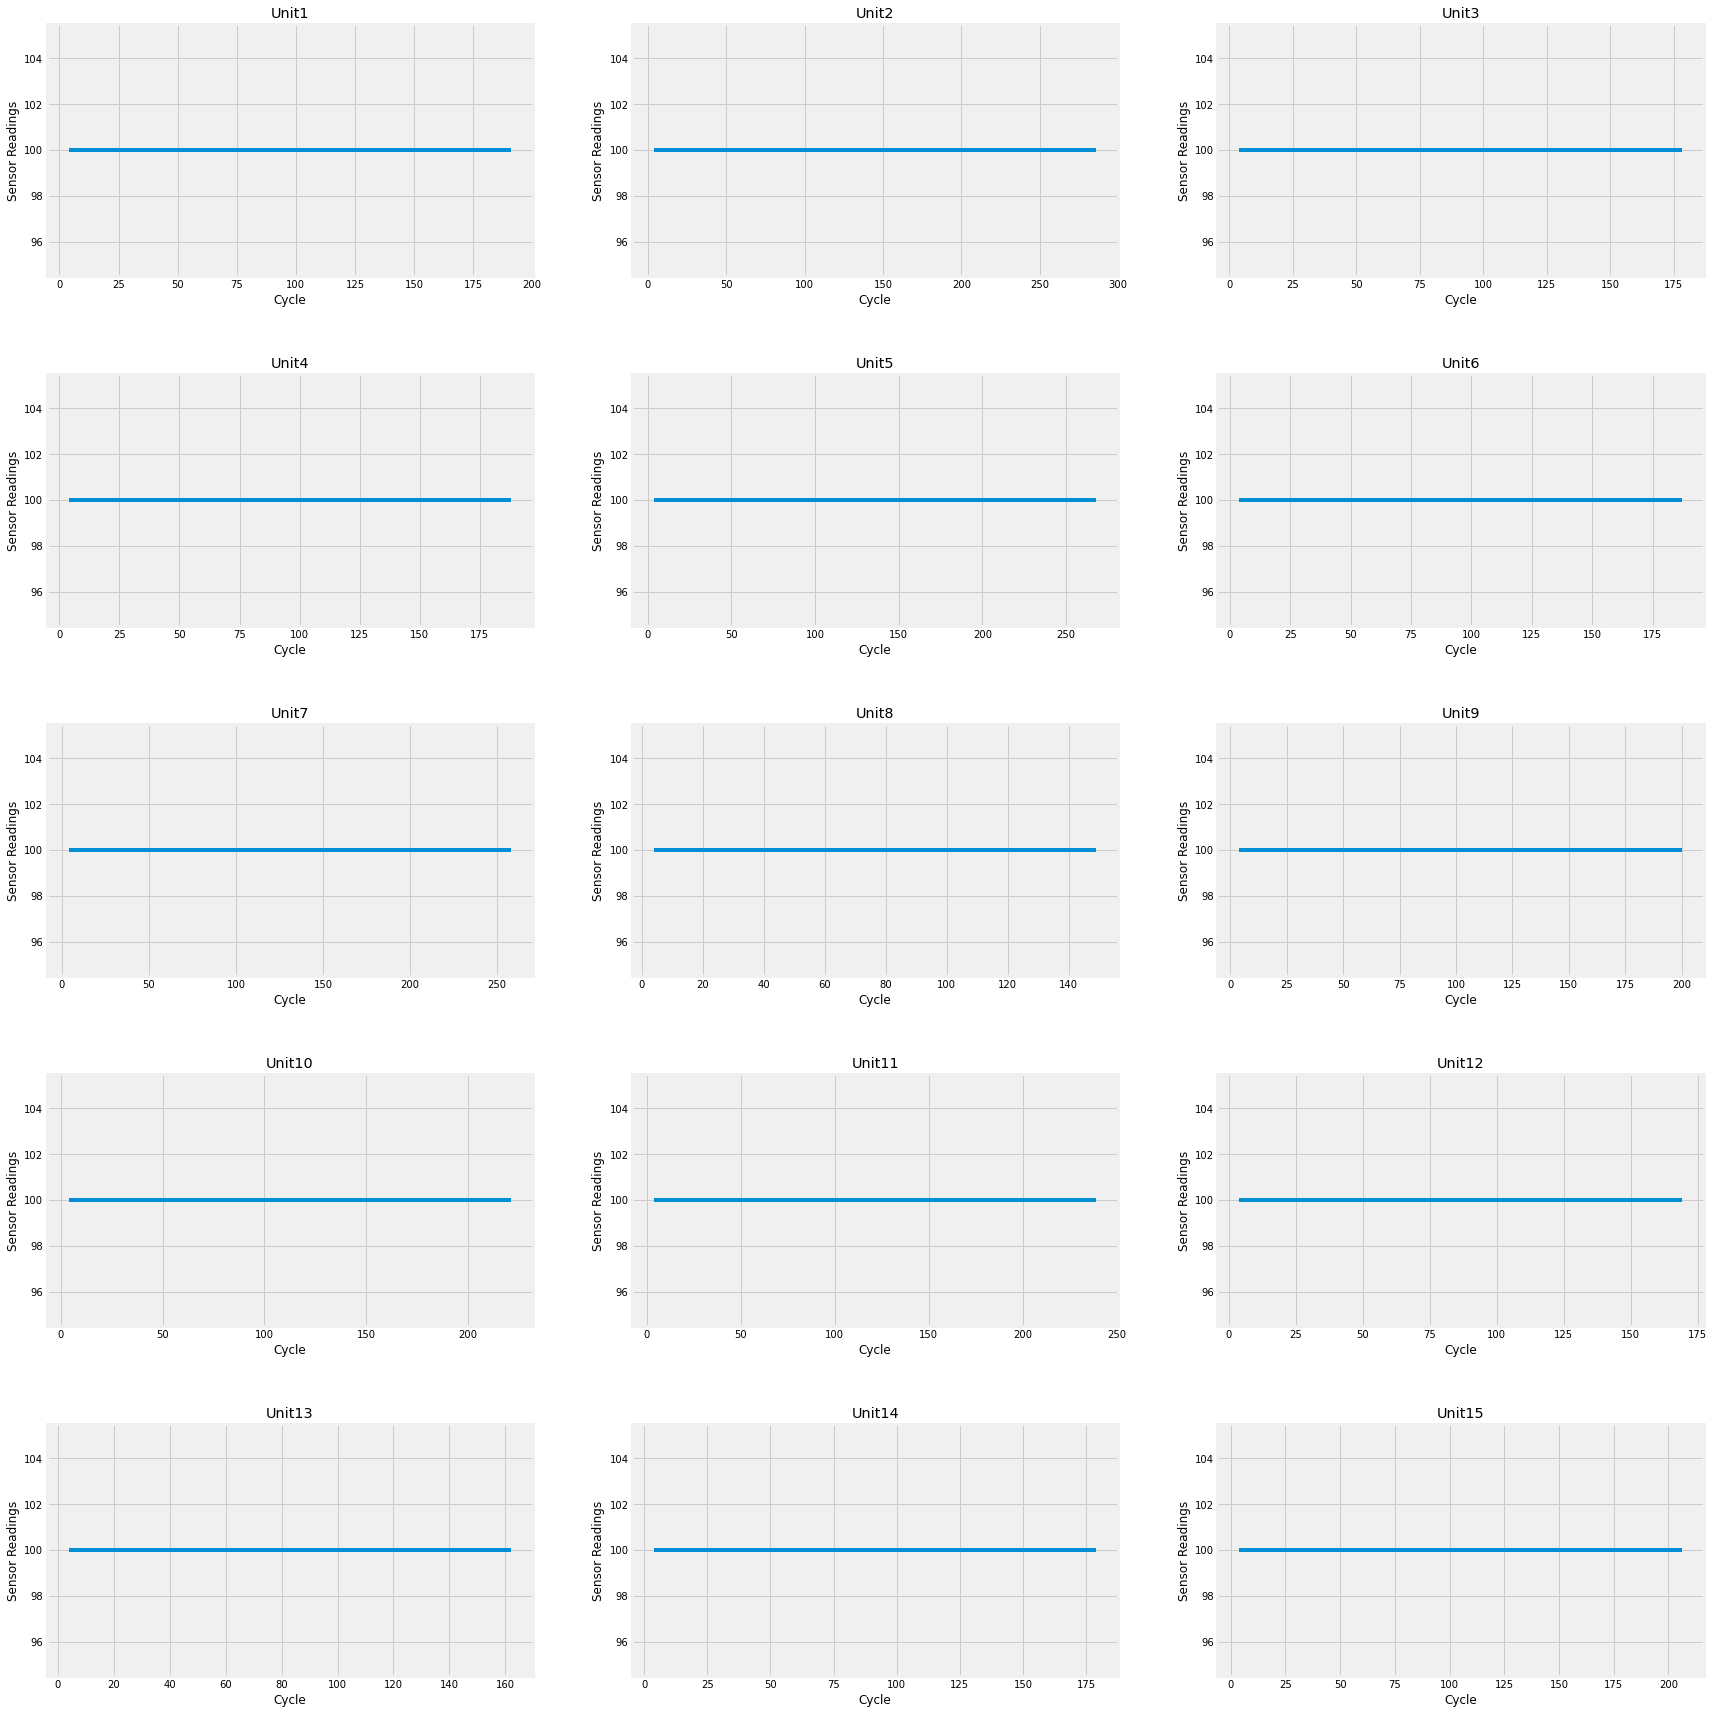

In [83]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = train.setting_3[train.unit_nr == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('Unit'+str(i+1))
    ax[i].set_xlabel("Cycle")
    ax[i].set_ylabel("Sensor Readings")
    plt.tight_layout(pad=5.0)

In [89]:
# to check if there exist any deviation in operational setting 3 using standard deviation

temp_df = train.groupby('unit_nr')['setting_3'].std()
temp_df.sort_values(ascending=False).head()

# REMARKS ---> No changes in st.dev wrt operational setting 3

unit_nr
1     0.0
64    0.0
74    0.0
73    0.0
72    0.0
Name: setting_3, dtype: float64

In [88]:
temp_df = train.groupby('unit_nr')['setting_3'].mean()
temp_df.sort_values(ascending=False).head()

# REMARKS ---> No changes in mean value wrt operational setting 3

unit_nr
1     100.0
64    100.0
74    100.0
73    100.0
72    100.0
Name: setting_3, dtype: float64

In [93]:
# Dropping sensors which do not measure anything. See "Aircraft Predictive Maintenance" script
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
train_final = train.drop(drop_sensors, axis=1)
train_final

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_2      s_3  \
0            1            1    -0.0007    -0.0004      100.0  641.82  1589.70   
1            1            2     0.0019    -0.0003      100.0  642.15  1591.82   
2            1            3    -0.0043     0.0003      100.0  642.35  1587.99   
3            1            4     0.0007     0.0000      100.0  642.35  1582.79   
4            1            5    -0.0019    -0.0002      100.0  642.37  1582.85   
...        ...          ...        ...        ...        ...     ...      ...   
20626      100          196    -0.0004    -0.0003      100.0  643.49  1597.98   
20627      100          197    -0.0016    -0.0005      100.0  643.54  1604.50   
20628      100          198     0.0004     0.0000      100.0  643.42  1602.46   
20629      100          199    -0.0011     0.0003      100.0  643.23  1605.26   
20630      100          200    -0.0032    -0.0005      100.0  643.85  1600.38   

           s_4     s_7      s_8      s_9   s_11    s_12     s_13     s_14  \
0      1400.60  554.36  2388.06  9046.19  47.47  521.66  2388.02  8138.62   
1      1403.14  553.75  2388.04  9044.07  47.49  522.28  2388.07  8131.49   
2      1404.20  554.26  2388.08  9052.94  47.27  522.42  2388.03  8133.23   
3      1401.87  554.45  2388.11  9049.48  47.13  522.86  2388.08  8133.83   
4      1406.22  554.00  2388.06  9055.15  47.28  522.19  2388.04  8133.80   
...        ...     ...      ...      ...    ...     ...      ...      ...   
20626  1428.63  551.43  2388.19  9065.52  48.07  519.49  2388.26  8137.60   
20627  1433.58  550.86  2388.23  9065.11  48.04  519.68  2388.22  8136.50   
20628  1428.18  550.94  2388.24  9065.90  48.09  520.01  2388.24  8141.05   
20629  1426.53  550.68  2388.25  9073.72  48.39  519.67  2388.23  8139.29   
20630  1432.14  550.79  2388.26  9061.48  48.20  519.30  2388.26  8137.33   

         s_15  s_17   s_20     s_21  RUL  
0      8.4195   392  39.06  23.4190  191  
1      8.4318   392  39.00  23.4236  190  
2      8.4178   390  38.95  23.3442  189  
3      8.3682   392  38.88  23.3739  188  
4      8.4294   393  38.90  23.4044  187  
...       ...   ...    ...      ...  ...  
20626  8.4956   397  38.49  22.9735    4  
20627  8.5139   395  38.30  23.1594    3  
20628  8.5646   398  38.44  22.9333    2  
20629  8.5389   395  38.29  23.0640    1  
20630  8.5036   396  38.37  23.0522    0  

[20631 rows x 20 columns]

In [94]:
# NOTE:  Check out "Aircraft Predictive Maintenance" script for sensor plots

## Correlation Analysis - working sensors + RUL

<AxesSubplot:>

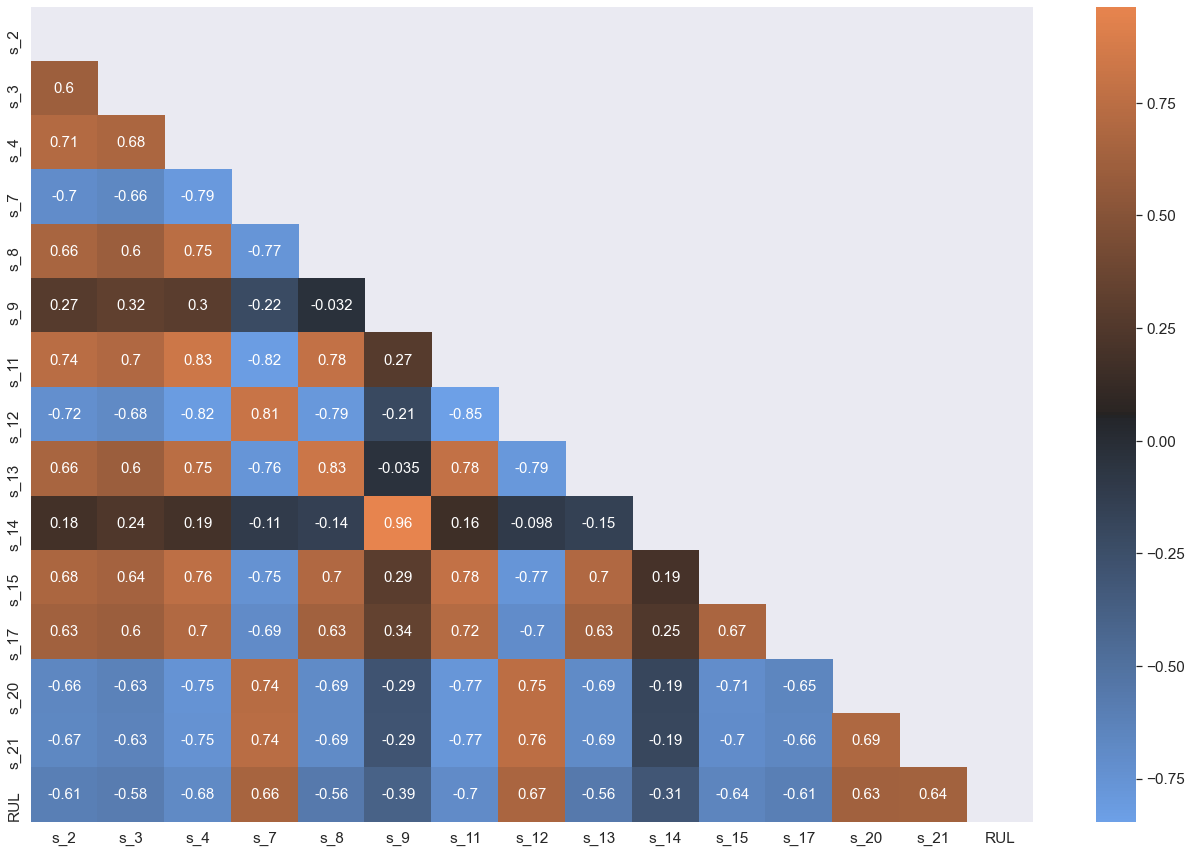

In [136]:
import seaborn as sns
cmap =sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.set(rc={'figure.figsize':(20,15)})
a4_dims = (11.7, 8.27)
corr = train_final.iloc[:,5:20].corr()
matrix = np.triu(corr)
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, cmap = cmap , mask=matrix, annot_kws={"size":15})


**High +ve correlation** between sensor 14 and sensor 9 i.e. 0.96. <i> (see intersection between s_9 and s_14.)</i>

Text(0.5, 1.0, 'correlation between sensor 14 and sensor 9')

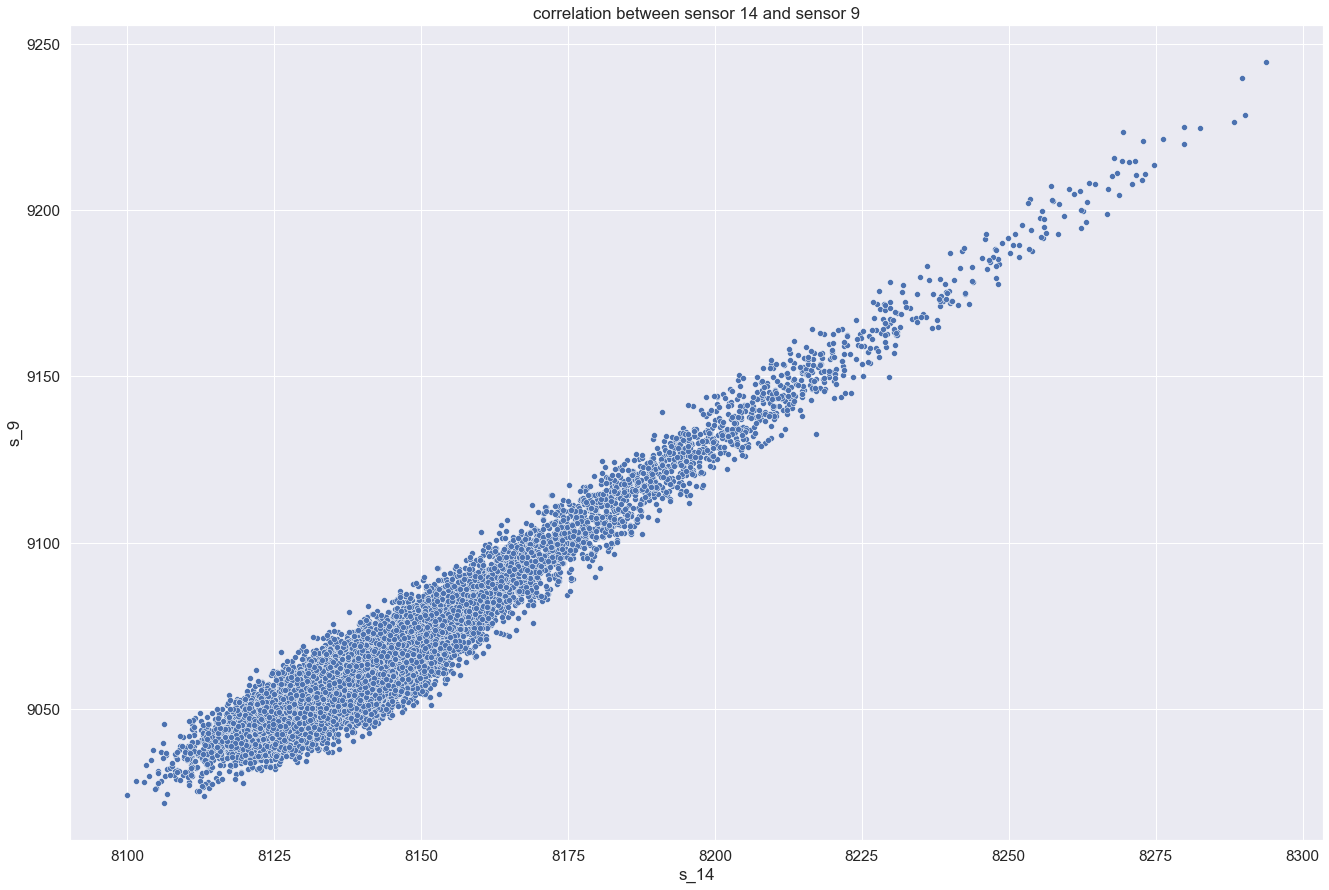

In [151]:
sns.scatterplot(x = train_final.s_14, y = train_final.s_9)
plt.title("correlation between sensor 14 and sensor 9")

In [196]:
features = train_final.iloc[:,5:19].columns
features

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')

One thing worth noting here is that sensor 14 and 9 are highly correlated and this can lead to
multicollinearity issue when modeling data. Thus it is important to account for this problem early on
by removing a sensor feature.

The criteria for removing a sensor feature is based on the sensor's relationship with RUL. 

Relationship between sensor 9 and RUL is more inverse(-0.39) than relationship between sensor 14 and RUL (-0.31)

therefore, **its reasonable to remove sensor 14.**

In [197]:
### IDEAL FEATURES FOR INPUT VARIABLES

features_v2 = [i for i in features if "s_14" not in i]

features_v2

['s_2',
 's_3',
 's_4',
 's_7',
 's_8',
 's_9',
 's_11',
 's_12',
 's_13',
 's_15',
 's_17',
 's_20',
 's_21']

In [198]:
train_final_v2 = train_final.drop(['s_14'], axis=1)
train_final_v2.columns

Index(['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_2',
       's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_15',
       's_17', 's_20', 's_21', 'RUL'],
      dtype='object')

## Visualizing sensor values before failure

In [199]:
#taken first 10 engines with RUL less than or equal to 50

group_df = train[(train.unit_nr <= 10) & (train.RUL <= 50)].groupby('unit_nr', as_index = False).\
    apply(lambda x: x.reset_index(drop = True)).reset_index()
#group_df
group_df = group_df.drop('level_0',axis = 1).set_index('level_1')
group_df

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1  \
level_1                                                                  
0              1          142     0.0026     0.0002      100.0  518.67   
1              1          143    -0.0005    -0.0003      100.0  518.67   
2              1          144     0.0025    -0.0004      100.0  518.67   
3              1          145    -0.0004    -0.0001      100.0  518.67   
4              1          146     0.0002    -0.0003      100.0  518.67   
...          ...          ...        ...        ...        ...     ...   
46            10          218    -0.0029     0.0004      100.0  518.67   
47            10          219    -0.0018     0.0004      100.0  518.67   
48            10          220    -0.0013     0.0002      100.0  518.67   
49            10          221     0.0005    -0.0001      100.0  518.67   
50            10          222     0.0002    -0.0003      100.0  518.67   

            s_2      s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  \
level_1                                   ...                                   
0        642.51  1595.29  1413.42  14.62  ...  2388.18  8124.87  8.4291  0.03   
1        642.77  1593.10  1404.21  14.62  ...  2388.11  8126.81  8.4419  0.03   
2        643.09  1591.89  1405.76  14.62  ...  2388.17  8125.47  8.4601  0.03   
3        642.95  1594.92  1409.63  14.62  ...  2388.15  8130.91  8.4644  0.03   
4        642.72  1586.75  1408.82  14.62  ...  2388.12  8129.19  8.4312  0.03   
...         ...      ...      ...    ...  ...      ...      ...     ...   ...   
46       643.70  1598.64  1426.21  14.62  ...  2388.22  8173.14  8.4954  0.03   
47       643.46  1603.54  1424.54  14.62  ...  2388.23  8177.31  8.5230  0.03   
48       643.46  1604.91  1422.76  14.62  ...  2388.25  8181.11  8.5182  0.03   
49       644.09  1604.40  1432.13  14.62  ...  2388.19  8183.38  8.5312  0.03   
50       643.66  1599.18  1436.29  14.62  ...  2388.16  8183.55  8.5159  0.03   

         s_17  s_18   s_19   s_20     s_21  RUL  
level_1                                          
0         392  2388  100.0  38.71  23.2816   50  
1         393  2388  100.0  38.79  23.2305   49  
2         393  2388  100.0  38.75  23.2249   48  
3         395  2388  100.0  38.67  23.1490   47  
4         392  2388  100.0  38.69  23.3233   46  
...       ...   ...    ...    ...      ...  ...  
46        395  2388  100.0  38.47  23.1209    4  
47        396  2388  100.0  38.48  23.2340    3  
48        396  2388  100.0  38.53  23.2187    2  
49        395  2388  100.0  38.22  23.1596    1  
50        398  2388  100.0  38.51  23.1434    0  

[510 rows x 27 columns]

In [200]:
group_df.head()
#group_df.tail()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1  \
level_1                                                                  
0              1          142     0.0026     0.0002      100.0  518.67   
1              1          143    -0.0005    -0.0003      100.0  518.67   
2              1          144     0.0025    -0.0004      100.0  518.67   
3              1          145    -0.0004    -0.0001      100.0  518.67   
4              1          146     0.0002    -0.0003      100.0  518.67   

            s_2      s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  \
level_1                                   ...                                   
0        642.51  1595.29  1413.42  14.62  ...  2388.18  8124.87  8.4291  0.03   
1        642.77  1593.10  1404.21  14.62  ...  2388.11  8126.81  8.4419  0.03   
2        643.09  1591.89  1405.76  14.62  ...  2388.17  8125.47  8.4601  0.03   
3        642.95  1594.92  1409.63  14.62  ...  2388.15  8130.91  8.4644  0.03   
4        642.72  1586.75  1408.82  14.62  ...  2388.12  8129.19  8.4312  0.03   

         s_17  s_18   s_19   s_20     s_21  RUL  
level_1                                          
0         392  2388  100.0  38.71  23.2816   50  
1         393  2388  100.0  38.79  23.2305   49  
2         393  2388  100.0  38.75  23.2249   48  
3         395  2388  100.0  38.67  23.1490   47  
4         392  2388  100.0  38.69  23.3233   46  

[5 rows x 27 columns]

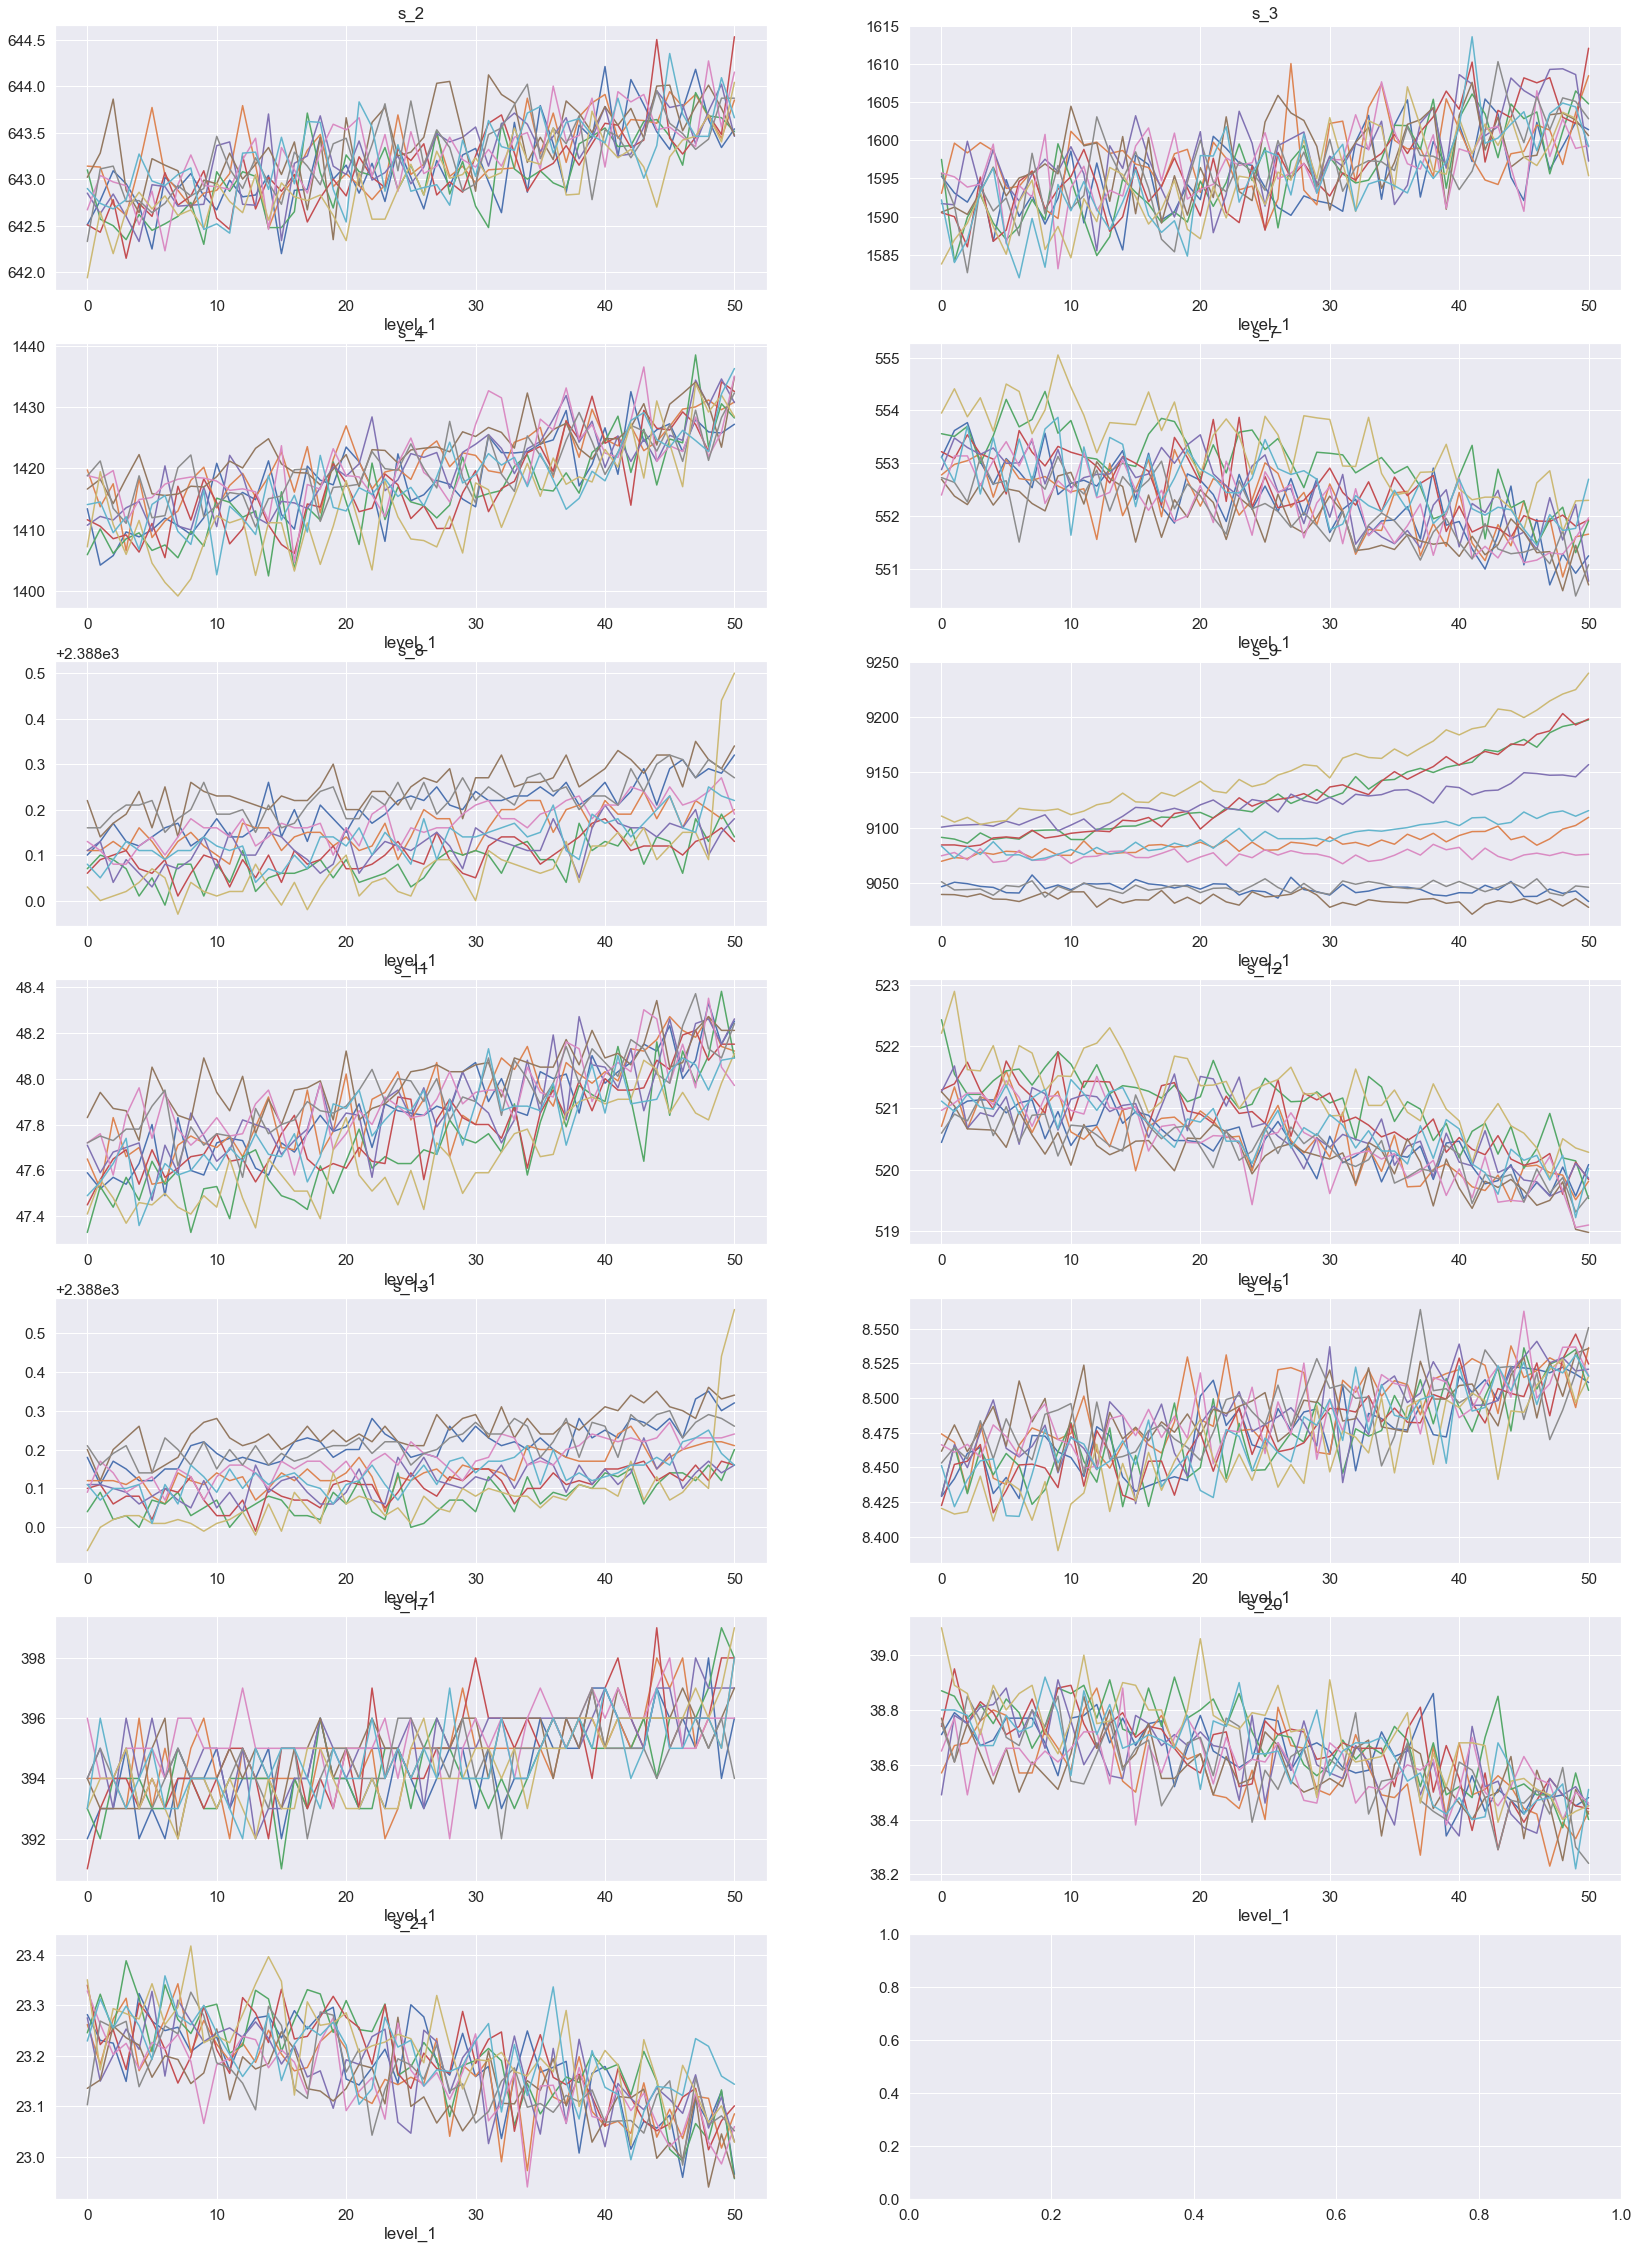

In [201]:
fig, ax = plt.subplots(figsize = (25,40), ncols = 2, nrows = 7)

ax = ax.ravel()
for i, features_v2 in enumerate(features_v2):
    group_df.groupby('unit_nr')[features_v2].plot(kind = "line", ax = ax[i])
    ax[i].set_title(features_v2)
